Paul Mooney November 2017

**Predict  Invasive Ductal Carcinoma
**

**Given a digital image of a breast histology sample, can you predict if invasive ductal carcinoma (IDC) is present?
**

This dataset consists of 5547 breast histology images of size 50 x 50 x 3, curated from Andrew Janowczyk website and used for a data science tutorial at Epidemium. The goal is to classify cancerous images (IDC : invasive ductal carcinoma) vs non-IDC images.

A number of the functions in the beginning of this script come from that tutorial.

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.misc import imresize, imread
%matplotlib inline

In [2]:
# I did the work for you ! 
X = np.load('../input/X.npy') # images
Y = np.load('../input/Y.npy') # labels associated to images (0 = no cancer, 1 = cancer)

In [3]:
# How many images ?

print('Total number of images : {}'.format(len(X)))
print('Number of images without cancer : {}'.format(np.sum(Y==0)))
print('Number of images with cancer : {}'.format(np.sum(Y==1)))
print('Percentage of positive images : {:.2f}%'.format(100*np.mean(Y)))

# What is the size of the images ?

print('Image shape (number of rows, number of columns, channels RGB): {}'.format(X[0].shape))

Total number of images : 5547
Number of images without cancer : 2759
Number of images with cancer : 2788
Percentage of positive images : 50.26%
Image shape (number of rows, number of columns, channels RGB): (50, 50, 3)


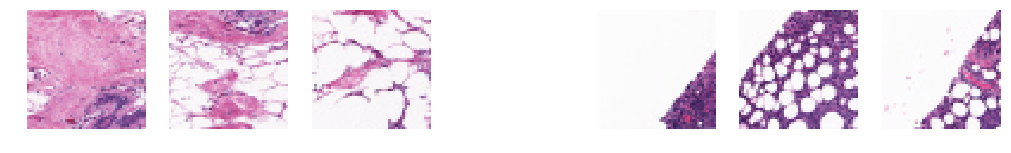

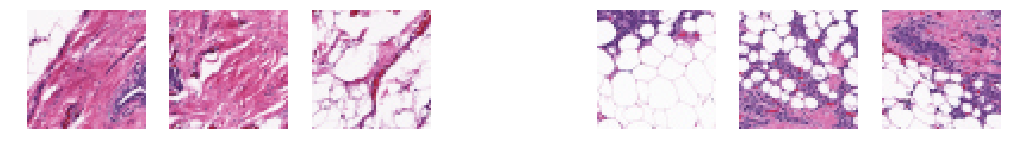

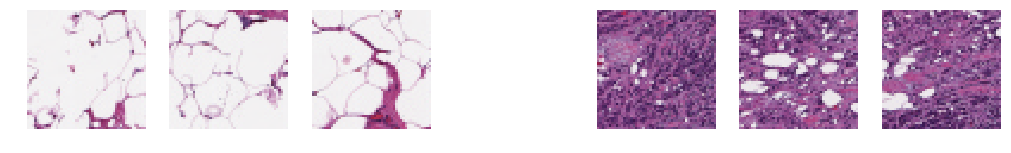

In [4]:
# Looking at some images

imgs0 = X[Y==0] # images with label 0 = no cancer, negative image
imgs1 = X[Y==1] # images with label 1 =    cancer, positive image

batch = 0 # Each batch plot 50 negative images on the left and 50 positive images on the right

for row in range(3):
    plt.figure(figsize=(20, 10))
    for col in range(3):
        plt.subplot(1,8,col+1)
        plt.imshow(imgs0[50*batch + 5*row+col])
        plt.axis('off')       
        plt.subplot(1,8,col+5)
        plt.imshow(imgs1[50*batch + 5*row+col])
        plt.axis('off')

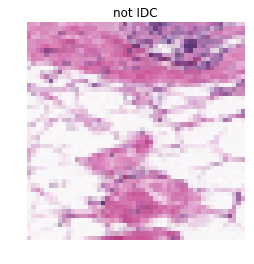

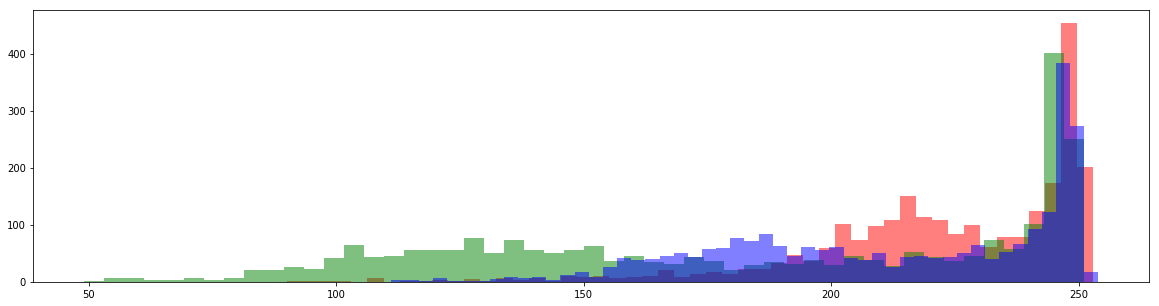

In [5]:
# We look at RGB histograms (represent colors). Histogram counts the number of pixels with a certain intensity
# between 0 and 255 for each color red, green and blue. A peak at 255 for all colors mean a lot of white ! 

i= 1 # Try 0, 1, 2.. for negative images and -1, -2, -3 for positive images and compare the histograms.
xi = X[i]

plt.imshow(xi)
plt.axis('off')
plt.title('IDC' if Y[i] else 'not IDC')

plt.figure(figsize=(20,5))
n_bins = 50
plt.hist(xi[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
plt.hist(xi[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
plt.hist(xi[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);

The data is scaled from 0 to 256 but we want it to be scaled from 0 to 1.

We also want to set aside 20% of the data for k-fold cross-validation testing.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Reduce Sample Size for DeBugging
X_train = X_train[0:3000] 
Y_train = Y_train[0:3000]
X_test = X_test[0:3000] 
Y_test = Y_test[0:3000]

# Normalize the data
X_train = X_train / 256.0
X_test = X_test / 256.0


print("Training Data Shape:", X_train.shape, X_train.shape)
print("Testing Data Shape:", X_test.shape, X_test.shape)


Training Data Shape: (3000, 50, 50, 3) (3000, 50, 50, 3)
Testing Data Shape: (1110, 50, 50, 3) (1110, 50, 50, 3)


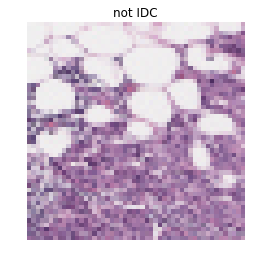

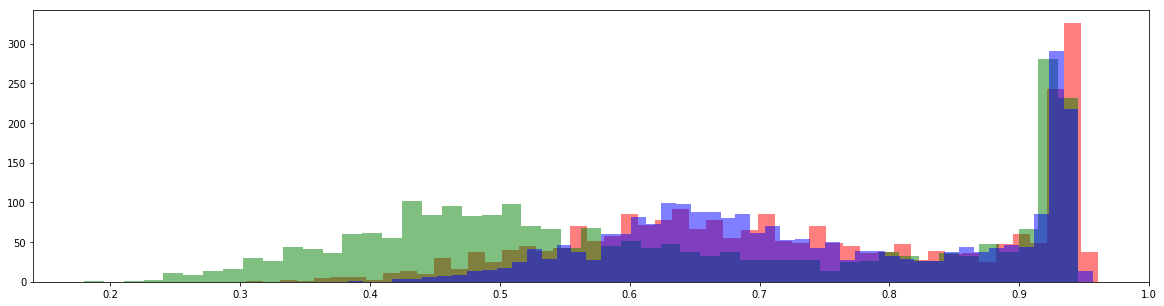

In [7]:
# We look at RGB histograms (represent colors). Histogram counts the number of pixels with a certain intensity
# between 0 and 255 for each color red, green and blue. A peak at 255 for all colors mean a lot of white ! 

i= 1 # Try 0, 1, 2.. for negative images and -1, -2, -3 for positive images and compare the histograms.
xi = X_train[i]

plt.imshow(xi)
plt.axis('off')
plt.title('IDC' if Y[i] else 'not IDC')

plt.figure(figsize=(20,5))
n_bins = 50
plt.hist(xi[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
plt.hist(xi[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
plt.hist(xi[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);

Now the data is scaled from 0 to 1.

Next we can try using some standard classification algorithms to predict whether or not each sample is cancerous.

In [8]:
# Now try to classify

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold




# Make Data 1D for compatability with standard classifiers

X_trainShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_testShape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]

X_train = X_train.reshape(X_train.shape[0], X_trainShape)
X_test = X_test.reshape(X_test.shape[0], X_testShape)

In [9]:
#runLogisticRegression
def runLogisticRegression(a,b,c,d):
    """Run LogisticRegression w/ Kfold CV"""
    model = LogisticRegression()
    model.fit(a,b)
    kfold = model_selection.KFold(n_splits=10)
    accuracy = model_selection.cross_val_score(model, c,d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('LogisticRegression - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
runLogisticRegression(X_train, Y_train, X_test, Y_test)

LogisticRegression - Training set accuracy: 0.66036036036 (0.051603616186)




Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

LR: 0.660360 (0.051604)
RF: 0.720721 (0.039681)
KNN: 0.701802 (0.050394)
SVM: 0.738739 (0.029053)
LSVM: 0.633333 (0.043215)
GNB: 0.729730 (0.020935)
DTC: 0.674775 (0.043849)


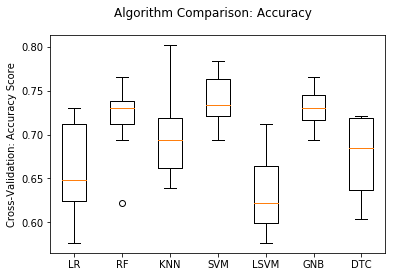


LR = LogisticRegression
RF = RandomForestClassifier
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
LSVM = LinearSVC
GNB = GaussianNB
DTC = DecisionTreeClassifier



In [10]:
# Compare Performance of Classification Algorithms
def compareABunchOfDifferentModelsAccuracy(a,b,c,d):
    """
    compare performance of classifiers on X_train, X_test, Y_train, Y_test
    http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
    http://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score
    """    
    print('')
    print('Compare Multiple Classifiers:')
    print('')
    print('K-Fold Cross-Validation Accuracy:')
    print('')
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('LSVM', LinearSVC()))
    models.append(('GNB', GaussianNB()))
    models.append(('DTC', DecisionTreeClassifier()))
    #models.append(('GBC', GradientBoostingClassifier()))
    #models.append(('LDA', LinearDiscriminantAnalysis()))       
    resultsAccuracy = []
    names = []
    for name, model in models:
        model.fit(a, b)
        kfold = model_selection.KFold(n_splits=10)
        accuracy_results = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
        resultsAccuracy.append(accuracy_results)
        names.append(name)
        accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
        print(accuracyMessage)  
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison: Accuracy')
    ax = fig.add_subplot(111)
    plt.boxplot(resultsAccuracy)
    ax.set_xticklabels(names)
    ax.set_ylabel('Cross-Validation: Accuracy Score')
    plt.show()
    return
compareABunchOfDifferentModelsAccuracy(X_train, Y_train, X_test, Y_test)


def defineModels():
    """
    This function just defines each abbreviation used in the previous function (e.g. LR = Logistic Regression)
    """
    print('')
    print('LR = LogisticRegression')
    print('RF = RandomForestClassifier')
    print('KNN = KNeighborsClassifier')
    print('SVM = Support Vector Machine SVC')
    print('LSVM = LinearSVC')
    print('GNB = GaussianNB')
    print('DTC = DecisionTreeClassifier')
    #print('GBC = GradientBoostingClassifier')
    #print('LDA = LinearDiscriminantAnalysis')
    print('')
    return
defineModels()

In [11]:
# If we transform our data back to 2D we can use 2D convolutional neural networks.
# I did the work for you ! 
X = np.load('../input/X.npy') # images
Y = np.load('../input/Y.npy') # labels associated to images (0 = no cancer, 1 = cancer)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Reduce Sample Size for DeBugging
X_train = X_train[0:3000] 
Y_train = Y_train[0:3000]
X_test = X_test[0:3000] 
Y_test = Y_test[0:3000]

# Normalize the data
X_train = X_train / 256.0
X_test = X_test / 256.0

print("Training Data Shape:", X_train.shape, X_train.shape)
print("Testing Data Shape:", X_test.shape, X_test.shape)



Training Data Shape: (3000, 50, 50, 3) (3000, 50, 50, 3)
Testing Data Shape: (1110, 50, 50, 3) (1110, 50, 50, 3)


In [12]:
import keras
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import model_from_json


# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)

Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [13]:
import sklearn
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D
def runKerasCNN(a,b,c,d):
    """
    Run Keras CNN: https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py
    """

    batch_size = 128
    num_classes = 2
    epochs = 12
    
    # input image dimensions
    img_rows, img_cols = X_train.shape[1],X_train.shape[2]
    input_shape = (img_rows, img_cols, 3)
    # the data, shuffled and split between train and test sets
    #(x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = a
    y_train = b
    x_test = c
    y_test = d
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    
    model.fit(x_train, y_train,
              batch_size=batch_size,
              verbose=1,
              epochs=epochs,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    
    #print('Test loss:', score[0])
    print('')
    print('Keras CNN #1A - accuracy:', score[1])
    print('')

    y_pred = model.predict(c)
    
    map_characters = {0: 'benign', 1: 'malignant'}
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    

runKerasCNN(X_train, Y_train,  X_test, Y_test)

Train on 3000 samples, validate on 1110 samples
Epoch 1/12
3000/3000 [==============================] - 32s 11ms/step - loss: 0.6964 - acc: 0.5657 - val_loss: 0.7089 - val_acc: 0.5126
Epoch 2/12
3000/3000 [==============================] - 32s 11ms/step - loss: 0.6522 - acc: 0.6347 - val_loss: 0.6580 - val_acc: 0.5793
Epoch 3/12
3000/3000 [==============================] - 32s 11ms/step - loss: 0.6493 - acc: 0.6340 - val_loss: 0.6230 - val_acc: 0.6613
Epoch 4/12
3000/3000 [==============================] - 32s 11ms/step - loss: 0.6132 - acc: 0.6670 - val_loss: 1.0536 - val_acc: 0.5090
Epoch 5/12
3000/3000 [==============================] - 32s 11ms/step - loss: 0.6344 - acc: 0.6773 - val_loss: 0.5552 - val_acc: 0.7297
Epoch 6/12
3000/3000 [==============================] - 33s 11ms/step - loss: 0.5997 - acc: 0.6853 - val_loss: 0.5907 - val_acc: 0.6793
Epoch 7/12
3000/3000 [==============================] - 33s 11ms/step - loss: 0.5831 - acc: 0.6933 - val_loss: 0.6233 - val_acc: 0.6432


In [14]:
# Now let's try a slightly different 2D convolutional NN architecture



def runAnotherKeras(a, b,c,d):

    # Set the CNN model 
    # my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
    
    batch_size = 128
    num_classes = 2
    epochs = 12
        
        # input image dimensions
    img_rows, img_cols = X_train.shape[1],X_train.shape[2]
    input_shape = (img_rows, img_cols, 3)
    model = Sequential()
    
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu', input_shape = input_shape))
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    #model.add(Dense(1024, activation = "relu"))
    #model.add(Dropout(0.5))
    model.add(Dense(512, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation = "softmax"))
    
    # Define the optimizer
    optimizer = RMSprop(lr=0.001, decay=1e-6)
    
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
    
    model.fit(a,b,
                  batch_size=batch_size,
                  verbose=1,
                  epochs=epochs,
                  validation_data=(c,d))
    score = model.evaluate(c,d, verbose=0)
        
        #print('Test loss:', score[0])
    print('')
    print('Keras CNN #2 - accuracy:', score[1])
    print('')

    y_pred = model.predict(c)
    
    map_characters = {0: 'benign', 1: 'malignant'}
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    


runAnotherKeras(X_train, Y_train, X_test, Y_test)

Train on 3000 samples, validate on 1110 samples
Epoch 1/12
3000/3000 [==============================] - 58s 19ms/step - loss: 2.5746 - acc: 0.6380 - val_loss: 0.6857 - val_acc: 0.7081
Epoch 2/12
3000/3000 [==============================] - 60s 20ms/step - loss: 0.6676 - acc: 0.7057 - val_loss: 0.6753 - val_acc: 0.5090
Epoch 3/12
3000/3000 [==============================] - 59s 20ms/step - loss: 0.6109 - acc: 0.7140 - val_loss: 0.6779 - val_acc: 0.5108
Epoch 4/12
3000/3000 [==============================] - 59s 20ms/step - loss: 0.5868 - acc: 0.7353 - val_loss: 0.6293 - val_acc: 0.6099
Epoch 5/12
3000/3000 [==============================] - 58s 19ms/step - loss: 0.5670 - acc: 0.7437 - val_loss: 0.6265 - val_acc: 0.6198
Epoch 6/12
3000/3000 [==============================] - 57s 19ms/step - loss: 0.5411 - acc: 0.7537 - val_loss: 0.8038 - val_acc: 0.5090
Epoch 7/12
3000/3000 [==============================] - 58s 19ms/step - loss: 0.5260 - acc: 0.7623 - val_loss: 0.6131 - val_acc: 0.6360


In [15]:
# Now I will try to improve the accuracy by adding in a data augmentation step.
# Now I will try a slightly different NN architecture with the data augmentation step.


def runAnotherKerasAugmented(a, b,c,d):

    # Set the CNN model 
    # my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
    
    batch_size = 128
    num_classes = 2
    epochs = 12
        
        # input image dimensions
    img_rows, img_cols = X_train.shape[1],X_train.shape[2]
    input_shape = (img_rows, img_cols, 3)
    model = Sequential()
    
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu', input_shape = input_shape))
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    #model.add(Dense(1024, activation = "relu"))
    #model.add(Dropout(0.5))
    model.add(Dense(512, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation = "softmax"))
    
    # Define the optimizer
    optimizer = RMSprop(lr=0.001, decay=1e-6)
    
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
    

    #datagen = ImageDataGenerator(
    #    featurewise_center=True,
    #    featurewise_std_normalization=True,
    #    rotation_range=20,
    #    width_shift_range=0.2,
    #    height_shift_range=0.2,
    #    horizontal_flip=True)

    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
    datagen.fit(a)

    # fits the model on batches with real-time data augmentation:
    model.fit_generator(datagen.flow(a,b, batch_size=32),
                        steps_per_epoch=len(a) / 32, epochs=epochs)



    score = model.evaluate(c,d, verbose=0)
        
    print('')
    print('Keras CNN #2B - accuracy:', score[1])
    print('')

    y_pred = model.predict(c)
    
    map_characters = {0: 'benign', 1: 'malignant'}
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    
   
runAnotherKerasAugmented(X_train, Y_train, X_test, Y_test)

Epoch 1/12
94/93 [==============================] - 66s 701ms/step - loss: 1.5032 - acc: 0.6744
Epoch 2/12
94/93 [==============================] - 64s 684ms/step - loss: 0.6787 - acc: 0.7010
Epoch 3/12
94/93 [==============================] - 64s 686ms/step - loss: 0.5936 - acc: 0.7235
Epoch 4/12
94/93 [==============================] - 62s 660ms/step - loss: 0.5723 - acc: 0.7338
Epoch 5/12
94/93 [==============================] - 65s 690ms/step - loss: 0.5657 - acc: 0.7440
Epoch 6/12
94/93 [==============================] - 64s 685ms/step - loss: 0.5465 - acc: 0.7534
Epoch 7/12
94/93 [==============================] - 64s 677ms/step - loss: 0.5442 - acc: 0.7585
Epoch 8/12
94/93 [==============================] - 71s 760ms/step - loss: 0.5437 - acc: 0.7608
Epoch 9/12
94/93 [==============================] - 71s 751ms/step - loss: 0.5353 - acc: 0.7621
Epoch 10/12
94/93 [==============================] - 72s 769ms/step - loss: 0.5474 - acc: 0.7560
Epoch 11/12
94/93 [====================

In [16]:
# Now I will try another 2D-Convolutional Neural Network, this time with 6 convolutions
# The hope is that this new architecture will help give us better accuracy.

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam
import sklearn



def create_model_six_conv(input_shape):
    """
    CNN Keras model with 6 convolutions.
    :param input_shape: input shape, generally X_train.shape[1:]
    :return: Keras model, RMS prop optimizer
    """
    batch_size = 128
    num_classes = 2
    epochs = 12
    map_characters = {0: 'benign', 1: 'malignant'}
    #num_classes = len(map_characters)
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3, 3), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    #return model, opt

#def load_model_from_checkpoint(weights_path, input_shape=(pic_size,pic_size,3)):
    #model, opt = create_model_six_conv(input_shape)
    #model.load_weights(weights_path)
    model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
    #return model

    model.fit(X_train,Y_train,
                  batch_size=batch_size,
                  verbose=1,
                  epochs=epochs,
                  validation_data=(X_test,Y_test))
    score = model.evaluate(X_test,Y_test, verbose=0)
        
        #print('Test loss:', score[0])
    print('')
    print('Keras CNN #3 - accuracy:', score[1])
    print('')
    
    
    
    
    y_pred = model.predict(X_test)
    
    print('\n', sklearn.metrics.classification_report(np.where(Y_test > 0)[1], 
                                                  np.argmax(y_pred, axis=1), 
                                                  target_names=list(map_characters.values())), sep='')

    
create_model_six_conv(X_train.shape[1:])

Train on 3000 samples, validate on 1110 samples
Epoch 1/12
3000/3000 [==============================] - 69s 23ms/step - loss: 0.6911 - acc: 0.5300 - val_loss: 0.6889 - val_acc: 0.6775
Epoch 2/12
3000/3000 [==============================] - 70s 23ms/step - loss: 0.6791 - acc: 0.5790 - val_loss: 0.7023 - val_acc: 0.5090
Epoch 3/12
3000/3000 [==============================] - 69s 23ms/step - loss: 0.6670 - acc: 0.6177 - val_loss: 0.7406 - val_acc: 0.5090
Epoch 4/12
3000/3000 [==============================] - 68s 23ms/step - loss: 0.7019 - acc: 0.5133 - val_loss: 0.6913 - val_acc: 0.6234
Epoch 5/12
3000/3000 [==============================] - 64s 21ms/step - loss: 0.6865 - acc: 0.5517 - val_loss: 0.6858 - val_acc: 0.5090
Epoch 6/12
3000/3000 [==============================] - 64s 21ms/step - loss: 0.6678 - acc: 0.6170 - val_loss: 0.7009 - val_acc: 0.5090
Epoch 7/12
3000/3000 [==============================] - 64s 21ms/step - loss: 0.6786 - acc: 0.5993 - val_loss: 0.7159 - val_acc: 0.5090


In [17]:
# Now let's try to increase the score by using data augmentation with a slightly different NN architecture

def kerasAugmentation(a,b,c,d):

    img_rows, img_cols = 50,50
    input_shape = (img_rows, img_cols, 3)
    batch_size = 128
    num_classes = 2
    epochs = 12
    map_characters = {0: 'benign', 1: 'malignant'}
        #num_classes = len(map_characters)
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3, 3), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        #return model, opt

    #def load_model_from_checkpoint(weights_path, input_shape=(pic_size,pic_size,3)):
        #model, opt = create_model_six_conv(input_shape)
        #model.load_weights(weights_path)
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
        #return model

    #datagen = ImageDataGenerator(
    #    featurewise_center=True,
    #    featurewise_std_normalization=True,
    #    rotation_range=20,
    #    width_shift_range=0.2,
    #    height_shift_range=0.2,
    #    horizontal_flip=True)

    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
    datagen.fit(a)

    # fits the model on batches with real-time data augmentation:
    model.fit_generator(datagen.flow(a,b, batch_size=32),
                        steps_per_epoch=len(a) / 32, epochs=epochs)



    score = model.evaluate(c,d, verbose=0)

            #print('Test loss:', score[0])
    print('')
    print('Keras CNN #3B - accuracy:', score[1])
    print('')

    y_pred = model.predict(c)

    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')
kerasAugmentation(X_train, Y_train, X_test, Y_test)

Epoch 1/12
94/93 [==============================] - 76s 809ms/step - loss: 0.6823 - acc: 0.5599
Epoch 2/12
94/93 [==============================] - 71s 750ms/step - loss: 0.6897 - acc: 0.5274
Epoch 3/12
94/93 [==============================] - 70s 747ms/step - loss: 0.6937 - acc: 0.5002
Epoch 4/12
94/93 [==============================] - 70s 750ms/step - loss: 0.6865 - acc: 0.5636
Epoch 5/12
94/93 [==============================] - 71s 751ms/step - loss: 0.6770 - acc: 0.5797
Epoch 6/12
94/93 [==============================] - 72s 769ms/step - loss: 0.6550 - acc: 0.6172
Epoch 7/12
94/93 [==============================] - 71s 751ms/step - loss: 0.6805 - acc: 0.5710
Epoch 8/12
94/93 [==============================] - 71s 752ms/step - loss: 0.6479 - acc: 0.6493
Epoch 9/12
94/93 [==============================] - 72s 762ms/step - loss: 0.6019 - acc: 0.6916
Epoch 10/12
94/93 [==============================] - 70s 749ms/step - loss: 0.6304 - acc: 0.6682
Epoch 11/12
94/93 [====================

In [18]:
# Now I will try data augmentation again but with a different NN architecture

def runKerasCNNAugment(a,b,c,d):
    """
    Run Keras CNN: https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py
    """

    batch_size = 128
    num_classes = 2
    epochs = 12
    
    # input image dimensions
    img_rows, img_cols = X_train.shape[1],X_train.shape[2]
    input_shape = (img_rows, img_cols, 3)
    # the data, shuffled and split between train and test sets
    #(x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = a
    y_train = b
    x_test = c
    y_test = d
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    

    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
    datagen.fit(a)

    # fits the model on batches with real-time data augmentation:
    model.fit_generator(datagen.flow(a,b, batch_size=32),
                        steps_per_epoch=len(a) / 32, epochs=epochs)



    score = model.evaluate(c,d, verbose=0)

            #print('Test loss:', score[0])
    print('')
    print('Keras CNN #1C - accuracy:', score[1])
    print('')

    y_pred = model.predict(c)
    
    map_characters = {0: 'benign', 1: 'malignant'}
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    
    
    
    score = model.evaluate(x_test, y_test, verbose=0)
    

runKerasCNNAugment(X_train, Y_train,  X_test, Y_test)

Epoch 1/12
94/93 [==============================] - 40s 428ms/step - loss: 0.7332 - acc: 0.5584
Epoch 2/12
94/93 [==============================] - 40s 421ms/step - loss: 0.6534 - acc: 0.6357
Epoch 3/12
94/93 [==============================] - 39s 418ms/step - loss: 0.6348 - acc: 0.6585
Epoch 4/12
94/93 [==============================] - 40s 425ms/step - loss: 0.6092 - acc: 0.6899
Epoch 5/12
94/93 [==============================] - 40s 421ms/step - loss: 0.5836 - acc: 0.7119
Epoch 6/12
94/93 [==============================] - 39s 411ms/step - loss: 0.5807 - acc: 0.7078
Epoch 7/12
94/93 [==============================] - 39s 413ms/step - loss: 0.5687 - acc: 0.7188
Epoch 8/12
94/93 [==============================] - 38s 409ms/step - loss: 0.5533 - acc: 0.7410
Epoch 9/12
94/93 [==============================] - 39s 417ms/step - loss: 0.5473 - acc: 0.7380
Epoch 10/12
94/93 [==============================] - 40s 422ms/step - loss: 0.5406 - acc: 0.7396
Epoch 11/12
94/93 [====================

In [19]:
# Now one more NN

import keras # We use keras library wuth tensorflow backend
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import Callback, EarlyStopping

# Special callback to see learning curves
class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

# # Preprocess the data : center and normalize
# X2 = X / 255.
# X2 = X2 - np.mean(X2, axis = (0,1,2))
# X2 = X2 / np.std(X2, axis = (0,1,2))

# Create the model
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(50, 50, 3))) # first layer : convolution
model.add(MaxPooling2D(pool_size=(3, 3))) # second layer : pooling (reduce the size of the image per 3) 
model.add(Conv2D(32, (5, 5), activation='relu')) 
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid')) # output 1 value between 0 and 1 : probability to have cancer
model.summary()

model.compile(loss=keras.losses.binary_crossentropy, # Use binary crossentropy as a loss function  
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=128,
          epochs=50,
          verbose=1,
          validation_data = [X_test, Y_test],
        callbacks = [MetricsCheckpoint('logs')])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 46, 46, 32)        2432      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 11, 11, 32)        25632     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                18496     
__________

Epoch 50/50
3000/3000 [==============================] - 11s 4ms/step - loss: 0.5387 - acc: 0.7453 - val_loss: 0.5097 - val_acc: 0.7689


Text(0.5,0,'Number of epochs')

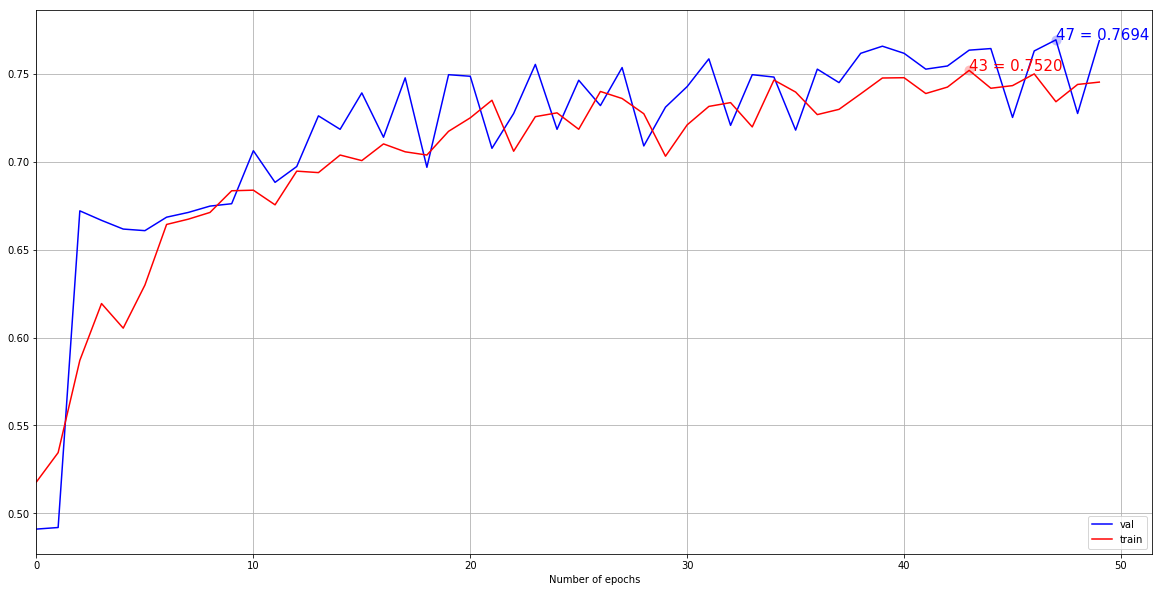

In [ ]:
plt.figure(figsize=(20,10))
metrics = np.load('logs.npy')[()]
filt = ['acc'] # try to add 'loss' to see the loss learning curve
for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
    l = np.array(metrics[k])
    plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
    x = np.argmin(l) if 'loss' in k else np.argmax(l)
    y = l[x]
    plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
    plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')
    
plt.legend(loc=4)

plt.axis([0, None, None, None]);
plt.grid()
plt.xlabel('Number of epochs')

In [ ]:
# Look at confusion matrix 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    



def runAnotherKerasAugmentedConfusion(a, b,c,d):

    # Set the CNN model 
    # my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
    
    batch_size = 128
    num_classes = 2
    epochs = 16
        
        # input image dimensions
    img_rows, img_cols = X_train.shape[1],X_train.shape[2]
    input_shape = (img_rows, img_cols, 3)
    model = Sequential()
    
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu', input_shape = input_shape))
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    #model.add(Dense(1024, activation = "relu"))
    #model.add(Dropout(0.5))
    model.add(Dense(512, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation = "softmax"))
    
    # Define the optimizer
    optimizer = RMSprop(lr=0.001, decay=1e-6)
    
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
    

    #datagen = ImageDataGenerator(
    #    featurewise_center=True,
    #    featurewise_std_normalization=True,
    #    rotation_range=20,
    #    width_shift_range=0.2,
    #    height_shift_range=0.2,
    #    horizontal_flip=True)

    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
    datagen.fit(a)

    # fits the model on batches with real-time data augmentation:
    model.fit_generator(datagen.flow(a,b, batch_size=32),
                        steps_per_epoch=len(a) / 32, epochs=epochs)



    score = model.evaluate(c,d, verbose=0)
        
    print('')
    print('Keras CNN #2B - accuracy:', score[1])
    print('')

    y_pred = model.predict(c)
    
    map_characters = {0: 'benign', 1: 'malignant'}
    dict_characters = map_characters
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    
   

    # Predict the values from the validation dataset
    Y_pred = model.predict(X_test)
    # Convert hot vectors prediction results to list of classes
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert hot vectors validation observations to list of classes
    Y_true = np.argmax(Y_test,axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plot the confusion matrix
    plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 

runAnotherKerasAugmentedConfusion(X_train, Y_train, X_test, Y_test)    
    

Epoch 1/16
 1/93 [..............................] - ETA: 2:38 - loss: 1.7286 - acc: 0.4688

With only two categories (benign/malignant), we should hope to do better than 80% accuracy.  I will troubleshoot this another day.